## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
#Reading the data from csv file
customer_df = pd.read_csv("ifood_df.csv")

In [3]:
#First five rows of the data
customer_df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [4]:
#columns in the data
customer_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
#Identifying null values in data
customer_df.isna().sum() #no null values in the data so the data is clean

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### Determining data type of each column 

In [6]:
#checking the datatype of each column
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
#Statical analysis of the data
customer_df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

### no.of unique values in each column

In [8]:
customer_df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [9]:
customer_df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

## Exploratory Data Analysis (EDA)

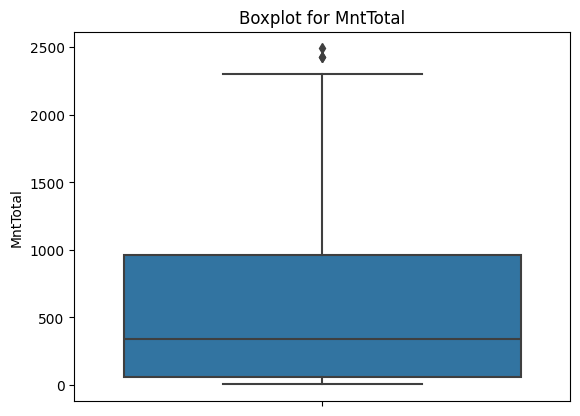

In [10]:
sns.boxplot(data=customer_df, y='MntTotal')
plt.title('Boxplot for MntTotal')
plt.show()

# Outliers 

In [11]:
Q1 = customer_df['MntTotal'].quantile(0.25)
Q3 = customer_df['MntTotal'].quantile(0.75)
IQR = Q3-Q1
outliers = customer_df[(customer_df.MntTotal < Q1 - 1.5*IQR) | (customer_df.MntTotal > Q3 + 1.5*IQR)]
outliers.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1159  90638.0        0         0       29      1156        120   
1467  87679.0        0         0       62      1259        172   
1547  90638.0        0         0       29      1156        120   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1159              915               94               144            96  ...   
1467              815               97               148            33  ...   
1547              915               94               144            96  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1159                 0              0                   0                0   
1467                 1              0                   0                0   
1547                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1159                     0                 1              0      2429   
1467                     1                 0              0      2491   
1547                     0                 1              0      2429   

      MntRegularProds  AcceptedCmpOverall  
1159             2333                   1  
1467             2458                   3  
1547             2333                   1  

[3 rows x 37 columns]

In [12]:
Q1 = customer_df['MntTotal'].quantile(0.25)
Q3 = customer_df['MntTotal'].quantile(0.75)
IQR = Q3-Q1
customer_df = customer_df[(customer_df.MntTotal > Q1-1.5*IQR) & (customer_df.MntTotal < Q3+1.5*IQR)]

In [13]:
#Statical measures of the data

In [14]:
customer_df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2202.000000  2202.000000  2202.000000  2202.000000  2202.000000   
mean    51570.283379     0.442779     0.507266    49.021344   304.960036   
std     20679.438848     0.537250     0.544429    28.944211   336.135586   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35182.500000     0.000000     0.000000    24.000000    24.000000   
50%     51258.500000     0.000000     0.000000    49.000000   176.500000   
75%     68146.500000     1.000000     1.000000    74.000000   505.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2202.000000      2202.000000      2202.000000       2202.000000   
mean     26.252044       164.336058        37.678474         26.967302   
std      39.589747       216.312982        54.821185         40.926101   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       230.750000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2202.000000  ...       2202.000000    2202.000000         2202.000000   
mean      44.014986  ...          0.257493       0.034514            0.089918   
std       51.747221  ...          0.437353       0.182587            0.286130   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2202.000000           2202.000000       2202.000000    2202.000000   
mean          0.024523              0.504995          0.164396       0.216167   
std           0.154702              0.500089          0.370719       0.411723   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2202.000000      2202.000000         2202.000000  
mean    560.193915       516.178928            0.297457  
std     572.096830       549.962471            0.678134  
min       4.000000      -283.000000            0.000000  
25%      56.000000        42.000000            0.000000  
50%     342.500000       288.000000            0.000000  
75%     962.000000       883.000000            0.000000  
max    2304.000000      2259.000000            4.000000  

[8 rows x 37 columns]

In [15]:
customer_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

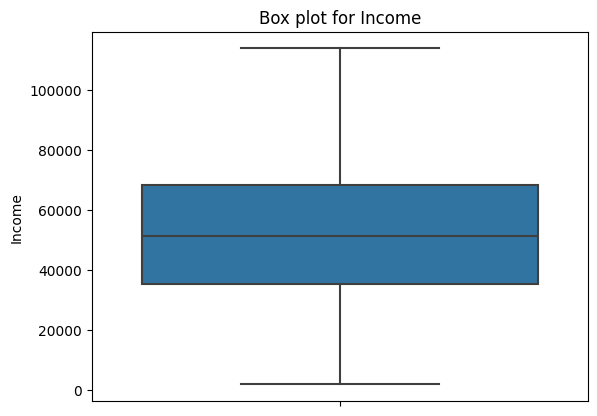

In [16]:
sns.boxplot(data=customer_df, y="Income")
plt.title("Box plot for Income")
plt.show()

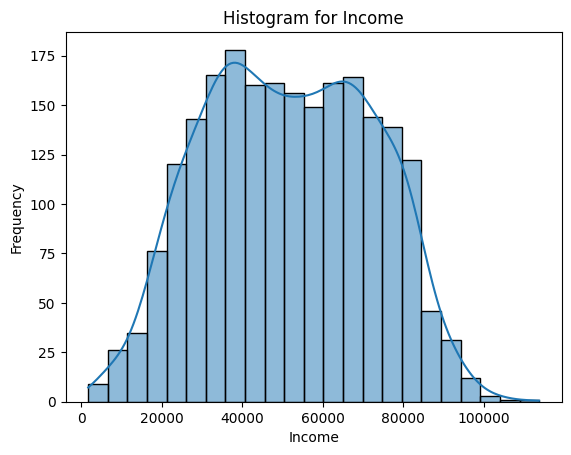

In [17]:
sns.histplot(data=customer_df, x='Income', fill=True, label='Income', kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram for Income')
plt.show()

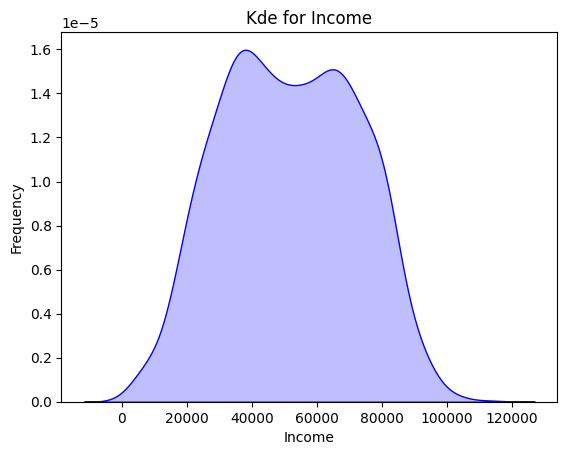

In [18]:
sns.kdeplot(data=customer_df,x='Income',color='b', fill=True, label='Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Kde for Income')
plt.show()

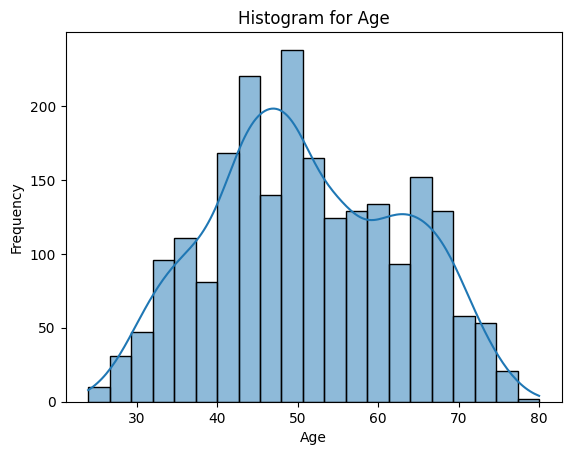

In [19]:
sns.histplot(data=customer_df, x='Age', fill=True, label='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram for Age')
plt.show()

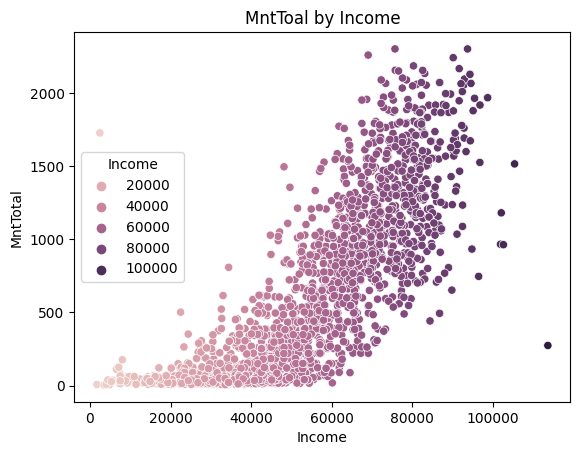

In [20]:
sns.scatterplot(data=customer_df, x="Income", y='MntTotal', hue='Income')
plt.title("MntToal by Income")
plt.show()

In [21]:
fig = px.scatter(customer_df, x='Income',y='MntTotal', color='Income',title='MntTotal by Income')
fig.show()

## Correlation Analysis 

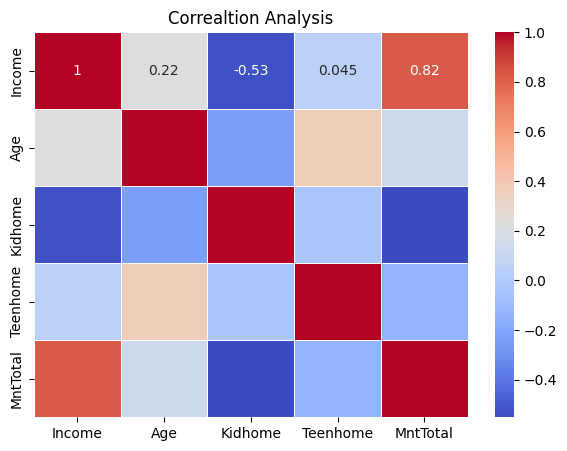

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(customer_df[['Income','Age','Kidhome','Teenhome','MntTotal']].corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correaltion Analysis")
plt.show()

In [23]:
plt.figure(figsize=(10,8))
fig = px.imshow(customer_df[['Income','Age','Kidhome','Teenhome','MntTotal']].corr(),text_auto=True, aspect="auto")
fig.show()

<Figure size 1000x800 with 0 Axes>

## Feature Engineering - coding the features to numerical data

In [24]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
customer_df['Martial'] = customer_df.apply(get_marital_status, axis=1)

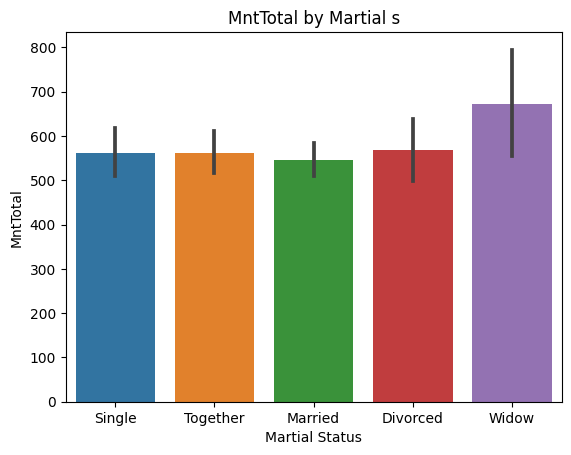

In [25]:
sns.barplot(data=customer_df, x='Martial', y='MntTotal')
plt.xlabel('Martial Status')
plt.ylabel('MntTotal')
plt.title('MntTotal by Martial s')
plt.show()

In [26]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
customer_df['In_relationship'] = customer_df.apply(get_relationship, axis=1)  
customer_df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  education_2n Cycle  \
0              172                88            88  ...                   0   
1                2                 1             6  ...                   0   
2              111                21            42  ...                   0   
3               10                 3             5  ...                   0   
4               46                27            15  ...                   0   

   education_Basic  education_Graduation  education_Master  education_PhD  \
0                0                     1                 0              0   
1                0                     1                 0              0   
2                0                     1                 0              0   
3                0                     1                 0              0   
4                0                     0                 0              1   

   MntTotal  MntRegularProds  AcceptedCmpOverall   Martial  In_relationship  
0      1529             1441                   0    Single                0  
1        21               15                   0    Single                0  
2       734              692                   0  Together                1  
3        48               43                   0  Together                1  
4       407              392                   0   Married                1  

[5 rows x 39 columns]

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
customer_df['Martial'] = label_encoding.fit_transform(customer_df['Martial'])

# k-Means Clustering

In [28]:
from sklearn.cluster import KMeans

## Standardising Data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering = ['Income','MntTotal','In_relationship']
customer_scaled = customer_df.copy()
customer_scaled[clustering] = scaler.fit_transform(customer_scaled[clustering])

## PCA - Dimensionality reduction

In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_result = pca.fit_transform(customer_scaled[clustering])
customer_scaled['pca1'] = pca_result[:,0]
customer_scaled['pca2'] = pca_result[:,1]

In [31]:
#Choosing the number of clusters using Elbow method
X=customer_scaled[clustering]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[6606.0, 3543.709662465084, 2163.1919916695083, 1342.8151210510662, 1005.1915849202097, 827.1451782921283, 662.4247463430218, 568.3587562960477, 490.55073614039276, 446.597338636853]


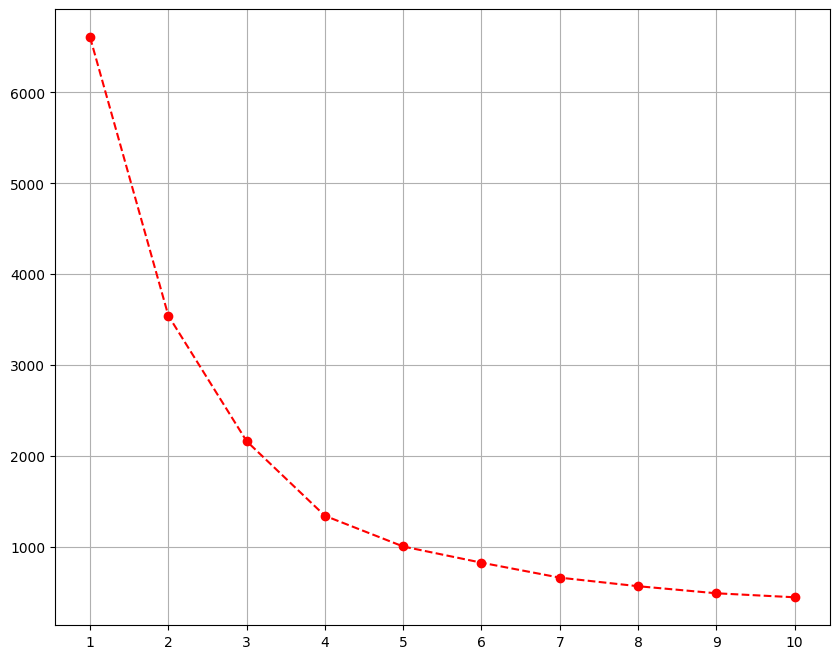

In [32]:
#plotting the Elbow method
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='r')
plt.xticks(range(1,11))
plt.grid("True")
plt.show()

In [33]:
model = KMeans(n_clusters=4, random_state = 42)
model.fit(customer_scaled[clustering])
customer_scaled['Cluster'] = model.predict(customer_scaled[clustering])

<Axes: xlabel='pca1', ylabel='pca2'>

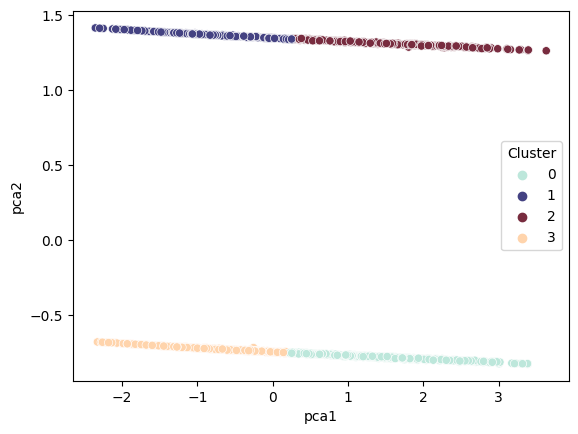

In [34]:
sns.scatterplot(data=customer_scaled, x='pca1', y='pca2',hue='Cluster', palette='icefire')

In [35]:
px.scatter(customer_scaled, x='pca1', y='pca2', color='Cluster')

In [36]:
customer_df['Cluster'] = customer_scaled.Cluster
customer_df.groupby('Cluster')[clustering].mean()

Income     MntTotal  In_relationship
Cluster                                            
0        71818.929329  1147.372792              1.0
1        37332.339956   150.761589              0.0
2        71946.155488  1159.612805              0.0
3        37892.819883   158.463158              1.0

<Axes: xlabel='Cluster', ylabel='Consumption'>

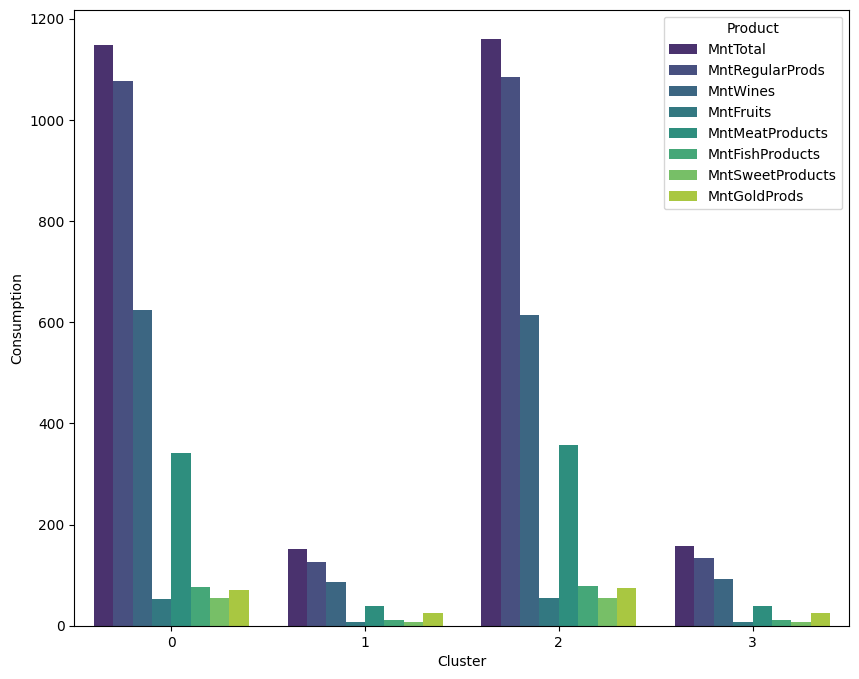

In [37]:
plt.figure(figsize=(10,8))
data = pd.melt(customer_df.groupby('Cluster')[['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().reset_index(), id_vars="Cluster", var_name="Product", value_name="Consumption")
sns.barplot(data=data, x="Cluster",y='Consumption',hue='Product', ci=None, palette='viridis')

In [38]:
customer_df.groupby('Cluster')[['MntTotal']].count()

MntTotal
Cluster          
0             566
1             453
2             328
3             855

In [39]:
customer_df.groupby('Cluster')[['MntTotal']].count().reset_index()

Cluster  MntTotal
0        0       566
1        1       453
2        2       328
3        3       855

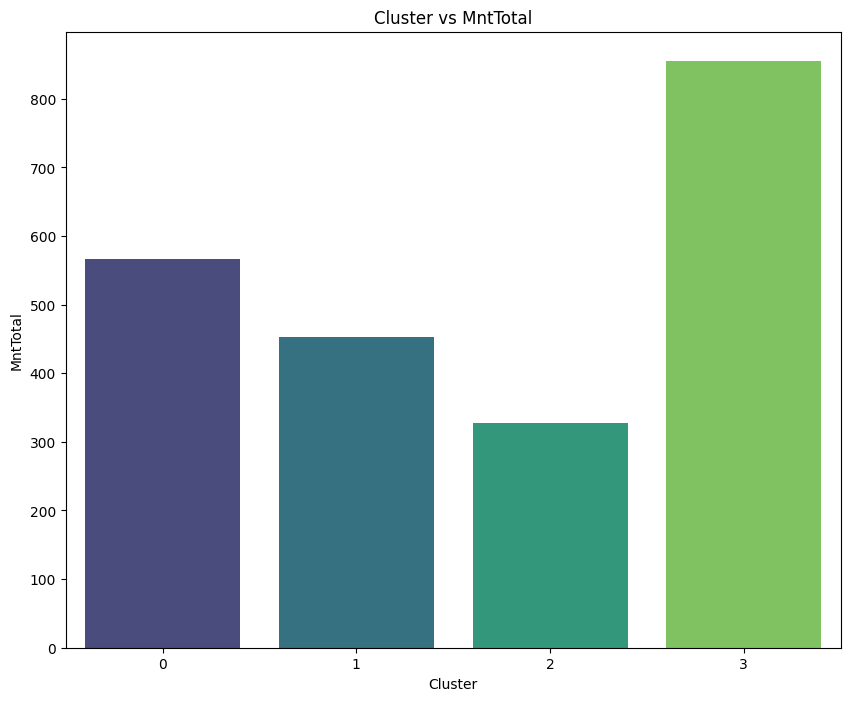

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(data=customer_df.groupby('Cluster')[['MntTotal']].count().reset_index(), x='Cluster', y='MntTotal',palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("MntTotal")
plt.title("Cluster vs MntTotal")
plt.show()

In [41]:
plt.figure(figsize=(10,8))
fig = px.bar(customer_df.groupby('Cluster')[['MntTotal']].count().reset_index(), x='Cluster', y='MntTotal',color='Cluster',text_auto=True)
#plt.xlabel("Cluster")
#plt.ylabel("MntTotal")
#plt.title("Cluster vs MntTotal")
fig.show()

<Figure size 1000x800 with 0 Axes>

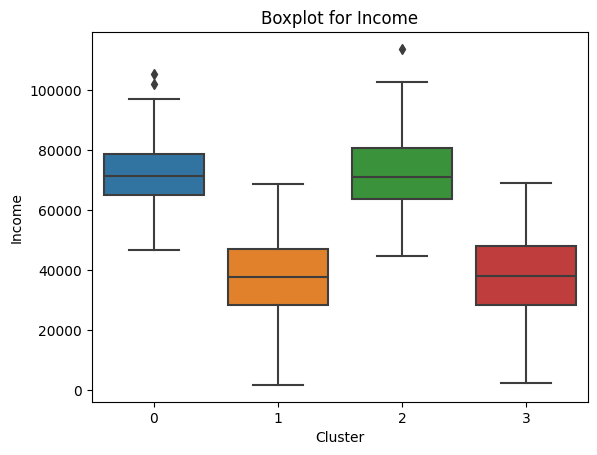

In [46]:
sns.boxplot(data=customer_df, x='Cluster', y="Income")
plt.title('Boxplot for Income')
plt.show()

In [42]:
fig = px.box(customer_df, x='Cluster', y='Income', title='Boxplot for Income')
fig.show()

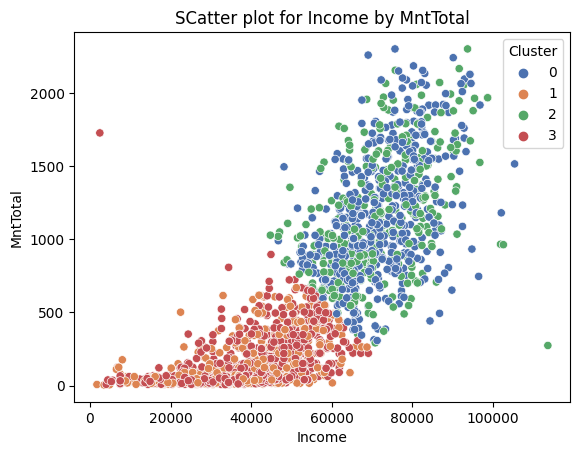

In [48]:
sns.scatterplot(data=customer_df, x='Income', y='MntTotal', hue='Cluster', palette='deep')
plt.title('SCatter plot for Income by MntTotal')
plt.show()

In [43]:
px.scatter(customer_df, x='Income',y='MntTotal', color='Cluster', title='Scatter plot for Income by MntTotal')

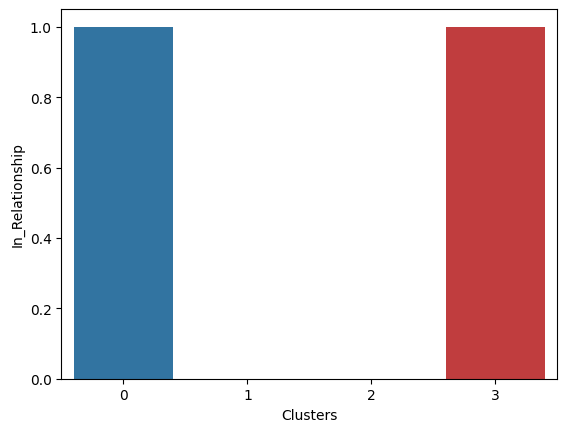

In [44]:
sns.barplot(data=customer_df, x='Cluster', y='In_relationship')
plt.xlabel('Clusters')
plt.ylabel('In_Relationship')
plt.show()

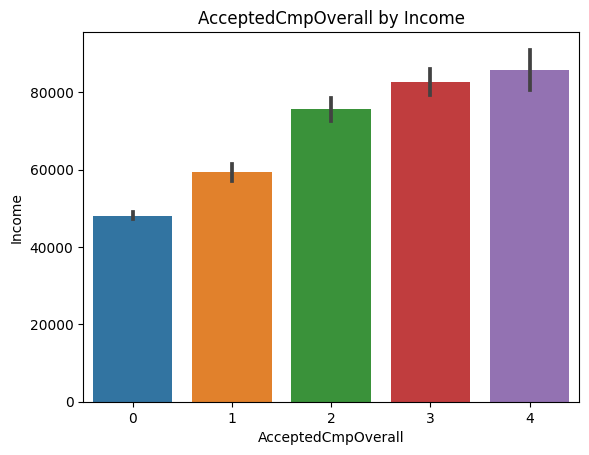

In [52]:
sns.barplot(data=customer_df, x='AcceptedCmpOverall', y='Income')
plt.title('AcceptedCmpOverall by Income')
plt.show()

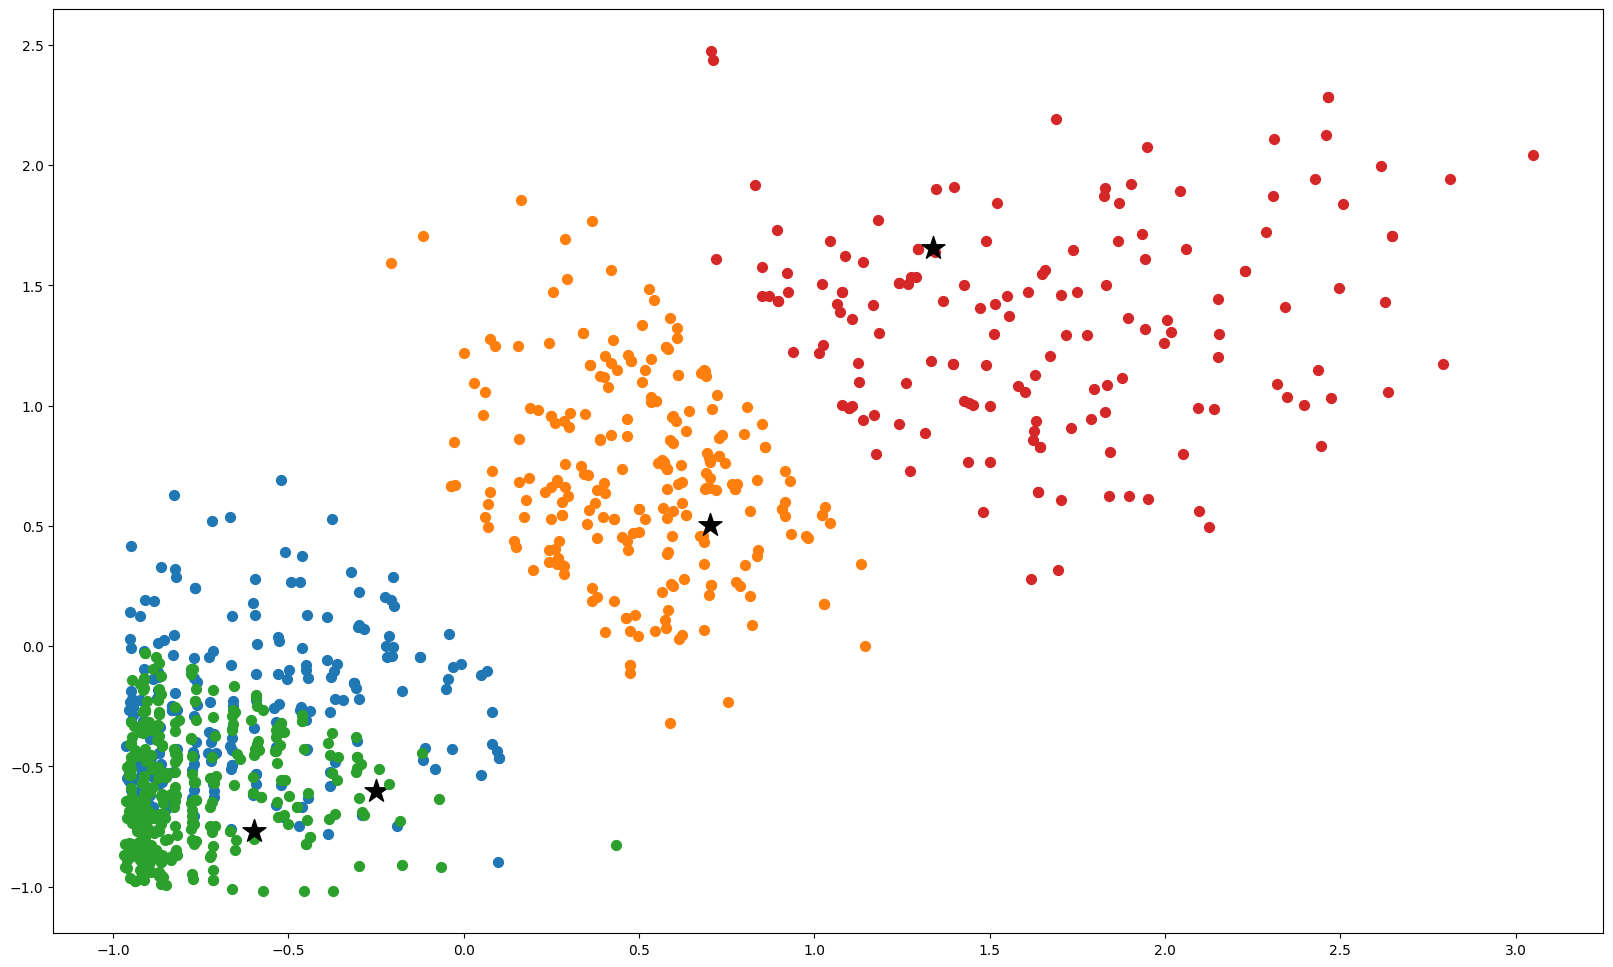

In [45]:
plt.figure(figsize=(20,12))
for clusters in range(4):
    cluster_p = X[kmeans.labels_ == clusters]
    centroid = cluster_p.mean(axis=0)
    plt.scatter(cluster_p['MntTotal'], cluster_p['Income'], s=50, label=f'Cluster {clusters+1}')
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {clusters+1}')
plt.show()